In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import missingno as mn
sns.set()

In [2]:
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected = True)

1. **PassengerId** is a unique identifying number assigned to each passenger.
2. **Survived** is a flag that indicates if a passenger survived or died ( i.e., 0 = No, 1 = Yes).
3. **Pclass** is the passenger class (i.e., 1 = 1st class, 2 = 2nd class, 3 = 3rd class).
4. **Name** is the name of the passenger.
5. **Sex** indicates the gender of the passenger (i.e., Male or female).
6. **Age** indicates the age of the passenger.
7. **Sibsp**  is the number of siblings/spouses aboard.
8. **Parch** is the number of parents/children aboard.
9. **Ticket** indicates the ticket number issued to the passenger.
10. **Fare** indicates the amount of money spent on their ticket.
11. **Cabin** indicates the cabin category occupied by the passenger.
12. **Embarked** indicates the port where the passenger embarked from (i.e., C = Cherbourg, Q = Queenstown, S = Southampton).

'Customize visualization'
plt.style.use('bmh')
sns.set_style({'axes.grid':False})

In [4]:
train = pd.read_csv('./train.csv' ,sep=',')
display(train.head(2))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
test = pd.read_csv('./test.csv', sep=',')
display(test.head(2))

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [6]:
merged = pd.concat([train, test], sort = False)

In [7]:
merged.shape

(1309, 12)

In [8]:
absolute_frequency = train.Age.value_counts()

In [14]:
relative_frequency = round(train.Age.value_counts(normalize= True) * 100,2)

In [16]:
df = pd.DataFrame({'absolute_frequency' : absolute_frequency, 'relative_frequency' : relative_frequency})

In [17]:
df

,absolute_frequency,relative_frequency
24.00,30,4.20
22.00,27,3.78
18.00,26,3.64
19.00,25,3.50
30.00,25,3.50
28.00,25,3.50
21.00,24,3.36
25.00,23,3.22
36.00,22,3.08
29.00,20,2.80


In [24]:
# This portion plots absolute frequency with bar labeled.
fig_size = (18,5)
font_size = 15
title_size = 18

In [25]:
def abs_bar_labels():
    font_size = 15
    plt.ylabel('Absolute Frequency', fontsize = font_size)
    plt.xticks(rotation = 0, fontsize = font_size)
    plt.yticks([])
    
    # Set individual bar lebels in absolute number
    for x in ax.patches:
        ax.annotate(x.get_height(), 
        (x.get_x() + x.get_width()/2., x.get_height()), ha = 'center', va = 'center', xytext = (0, 7), 
        textcoords = 'offset points', fontsize = font_size, color = 'black')
    
'''#2.Function for displaying bar lebels in relative scale.'''
def pct_bar_labels():
    font_size = 15
    plt.ylabel('Relative Frequency (%)', fontsize = font_size)
    plt.xticks(rotation = 0, fontsize = font_size)
    plt.yticks([]) 
    
    # Set individual bar lebels in proportional scale
    for x in ax1.patches:
        ax1.annotate(str(x.get_height()) + '%', 
        (x.get_x() + x.get_width()/2., x.get_height()), ha = 'center', va = 'center', xytext = (0, 7), 
        textcoords = 'offset points', fontsize = font_size, color = 'black')

In [37]:
def absolute_and_relative_freq(variable):
    global  ax, ax1 
    # Dataframe of absolute and relative frequency
    absolute_frequency = variable.value_counts()
    relative_frequency = round(variable.value_counts(normalize = True)*100, 2)
    # Was multiplied by 100 and rounded to 2 decimal points for percentage.
    df = pd.DataFrame({'Absolute Frequency':absolute_frequency, 'Relative Frequency(%)':relative_frequency})
    print('Absolute & Relative Frequency of',variable.name,':')
    display(df)
    
    # This portion plots absolute frequency with bar labeled.
    fig_size = (18,5)
    font_size = 15
    title_size = 18
    ax =  absolute_frequency.plot.bar(title = 'Absolute Frequency of %s' %variable.name, figsize = fig_size)
    #     ax.title.set_size(title_size)
    #     abs_bar_labels()  # Displays bar labels in abs scale.
    plt.show()
    
    # This portion plots relative frequency with bar labeled.
    ax1 = relative_frequency.plot.bar(title = 'Relative Frequency of %s' %variable.name, figsize = fig_size)
    #     ax1.title.set_size(title_size)
    #     pct_bar_labels() # Displays bar labels in relative scale.
    plt.show()

# Survived

Absolute & Relative Frequency of Survived :


,Absolute Frequency,Relative Frequency(%)
0.0,549,61.62
1.0,342,38.38


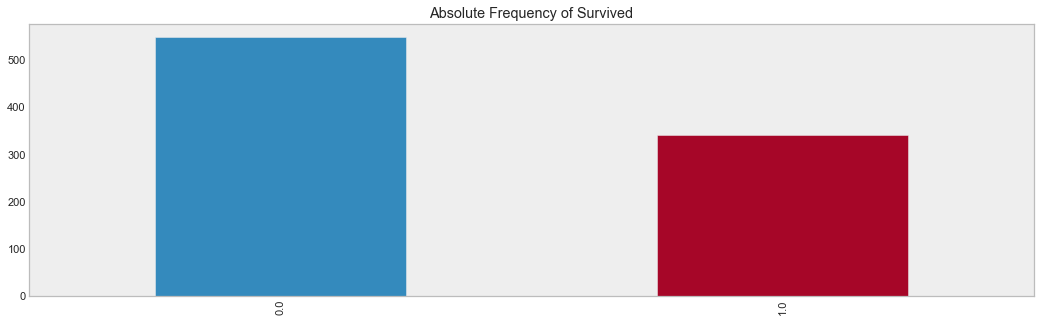

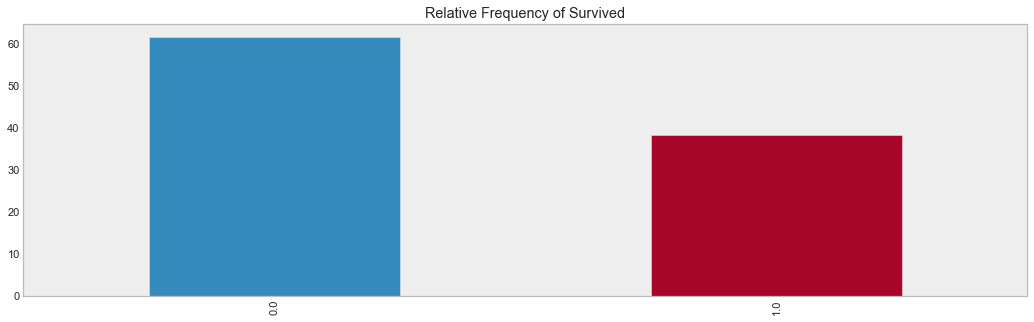

In [33]:
absolute_and_relative_freq(merged.Survived)

# Sex

Absolute & Relative Frequency of Sex :


,Absolute Frequency,Relative Frequency(%)
male,843,64.4
female,466,35.6


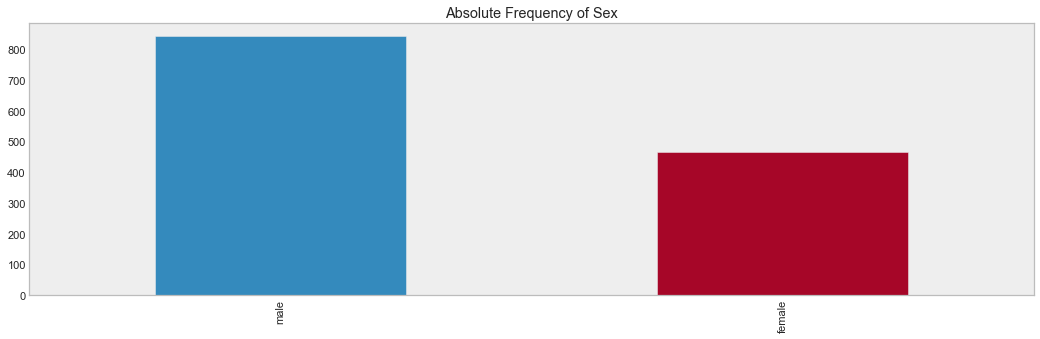

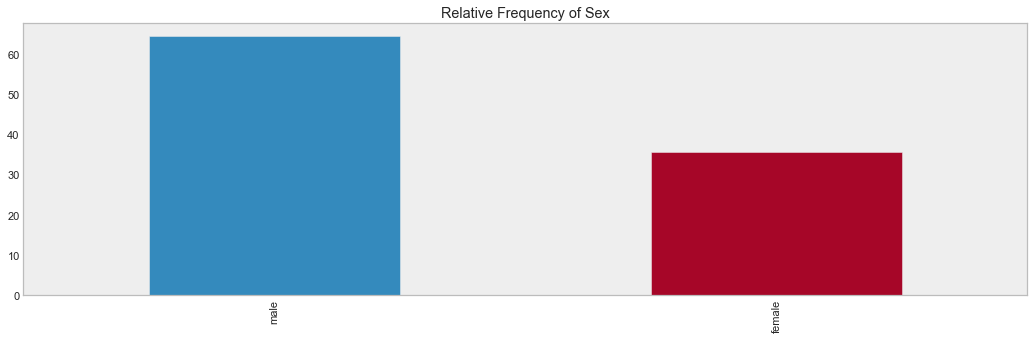

In [34]:
absolute_and_relative_freq(merged.Sex)

# PClass

Absolute & Relative Frequency of Pclass :


,Absolute Frequency,Relative Frequency(%)
3,709,54.16
1,323,24.68
2,277,21.16


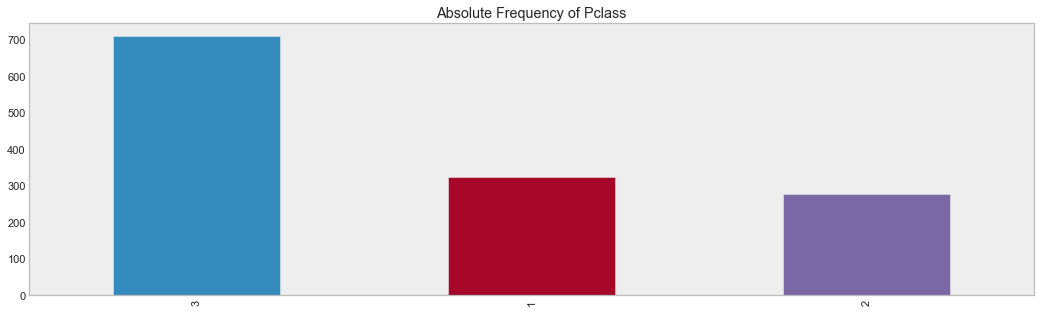

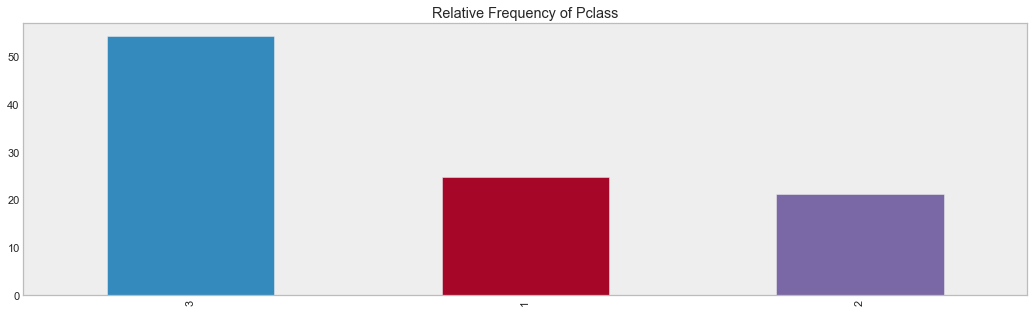

In [35]:
absolute_and_relative_freq(merged.Pclass)

Absolute & Relative Frequency of Embarked :


,Absolute Frequency,Relative Frequency(%)
S,914,69.93
C,270,20.66
Q,123,9.41


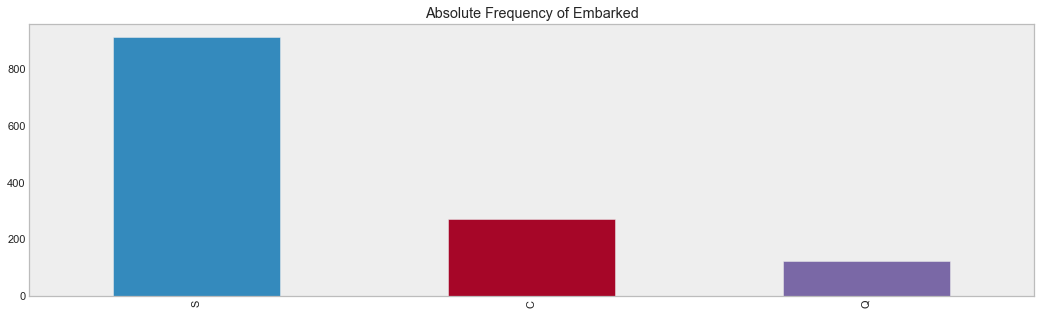

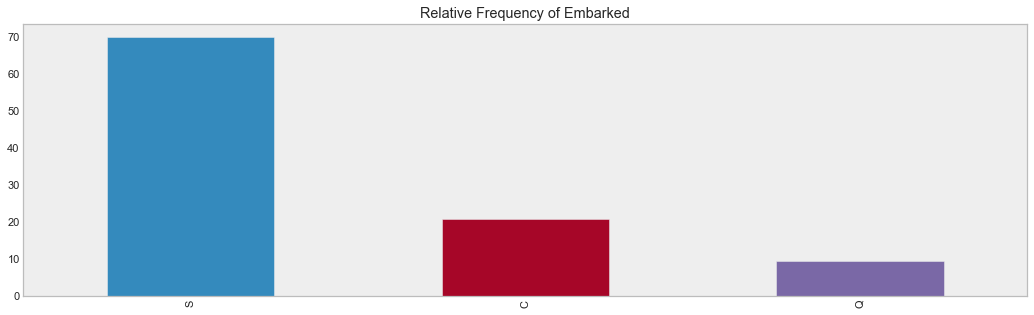

In [38]:
absolute_and_relative_freq(merged.Embarked)

# Name Cabin Ticket too many var

Absolute & Relative Frequency of Cabin :


,Absolute Frequency,Relative Frequency(%)
C23 C25 C27,6,2.03
B57 B59 B63 B66,5,1.69
G6,5,1.69
F2,4,1.36
C78,4,1.36
C22 C26,4,1.36
F4,4,1.36
D,4,1.36
F33,4,1.36
B96 B98,4,1.36


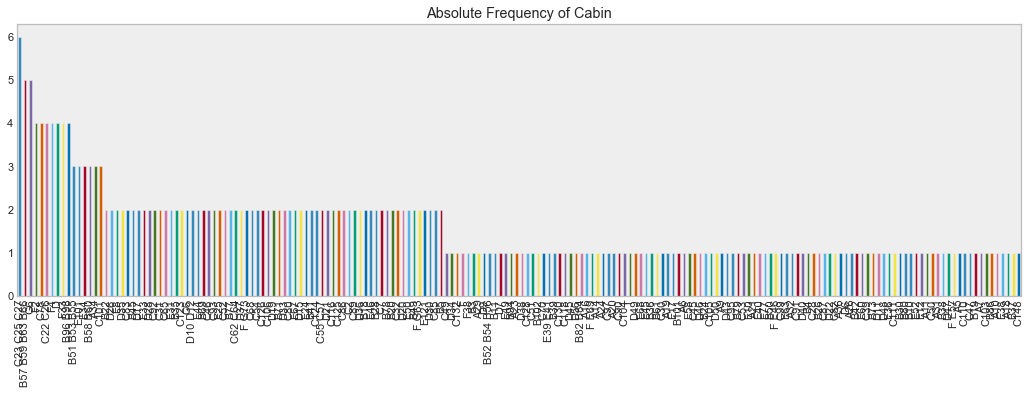

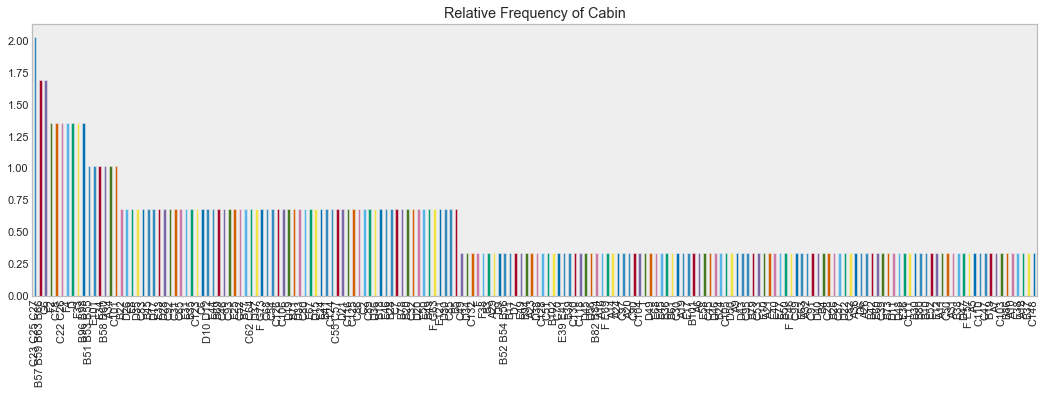

In [39]:
absolute_and_relative_freq(merged.Cabin)

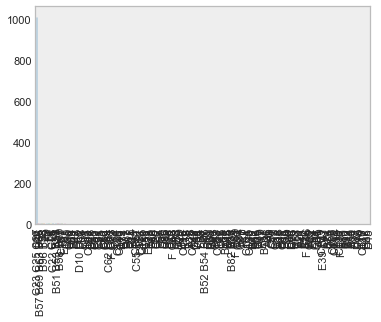

In [44]:
# too much variable
merged.Cabin.value_counts(dropna= False).plot.bar()

Absolute & Relative Frequency of SibSp :


,Absolute Frequency,Relative Frequency(%)
0,891,68.07
1,319,24.37
2,42,3.21
4,22,1.68
3,20,1.53
8,9,0.69
5,6,0.46


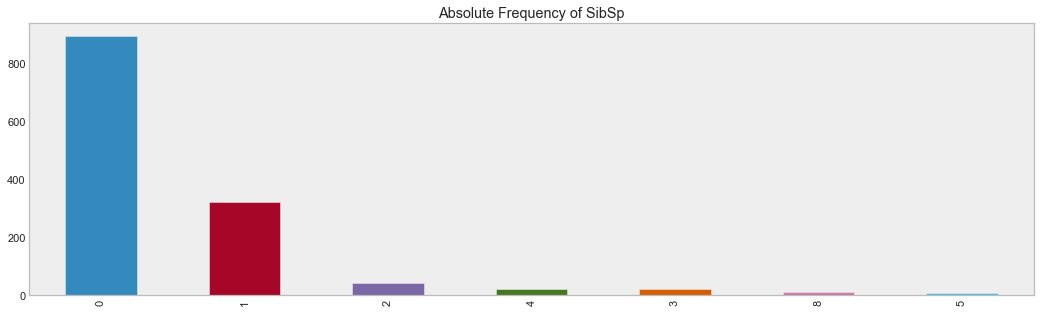

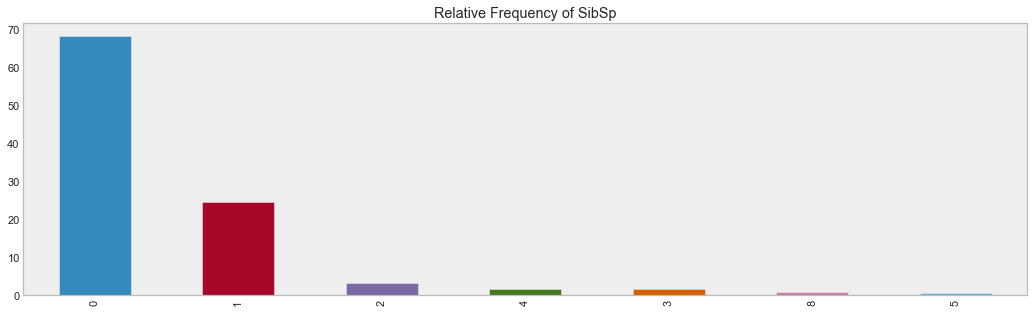

In [45]:
absolute_and_relative_freq(merged.SibSp)

Absolute & Relative Frequency of Parch :


,Absolute Frequency,Relative Frequency(%)
0,1002,76.55
1,170,12.99
2,113,8.63
3,8,0.61
5,6,0.46
4,6,0.46
9,2,0.15
6,2,0.15


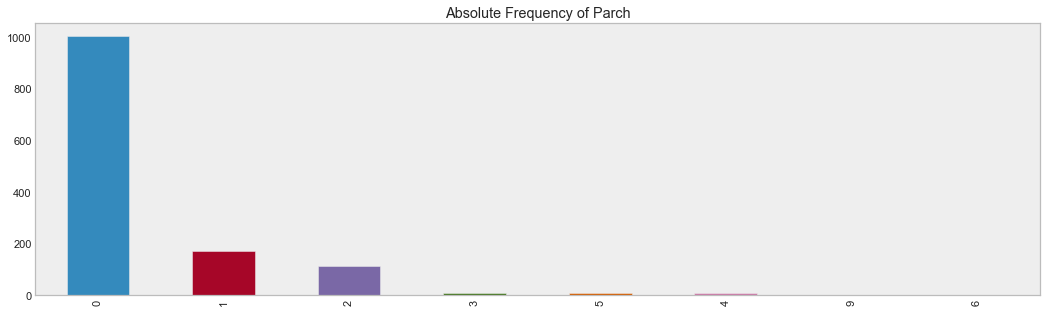

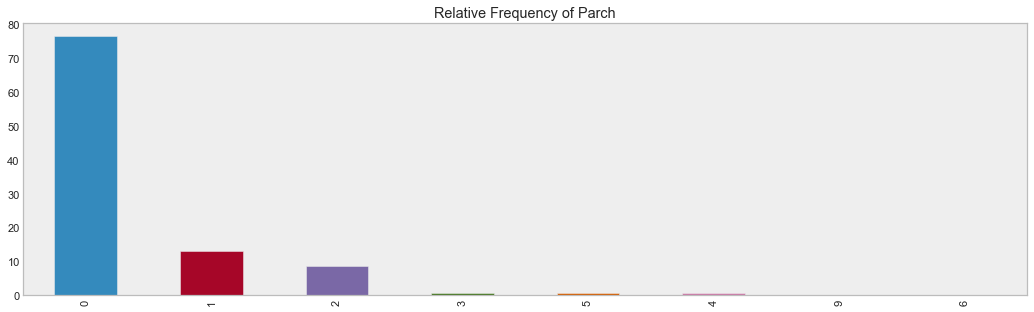

In [46]:
absolute_and_relative_freq(merged.Parch)

# Numerical

In [48]:
'''#1.Plot histogram.'''
def histogram(variable):
    global ax
    font_size = 15
    fig_size = (18, 7)
    title_size = 18
    ax = variable.plot.hist(figsize = fig_size, color = 'salmon')
    plt.xlabel('%s' %variable.name, fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.title('%s' %variable.name + ' Distribution with Histogram', fontsize = title_size)
    abs_bar_labels()
    plt.show()
    
'''#2.Plot density plot .'''
def density_plot(variable):
    fig_size = (18, 7)
    font_size = 15
    title_size = 18
    plt.figure(figsize = fig_size)
    variable.plot.hist(density = True, color = 'coral')
    variable.plot.kde(style = 'k--')
    plt.xlabel('%s'%variable.name, fontsize = font_size)
    plt.ylabel('Density', fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.title('%s ' %variable.name + 'Distribution with Density Plot & Histogram', fontsize = title_size)
    plt.show()
    
'''#3.Calculate descriptive statistics.'''
def summary_stats(variable):
    stats = variable.describe()
    skew = pd.Series(variable.skew(), index = ['skewness'])
    df_stats = pd.DataFrame(pd.concat([skew, stats], sort = False), columns = [variable.name])
    df_stats.index.name = 'Stats'
    display(df_stats)

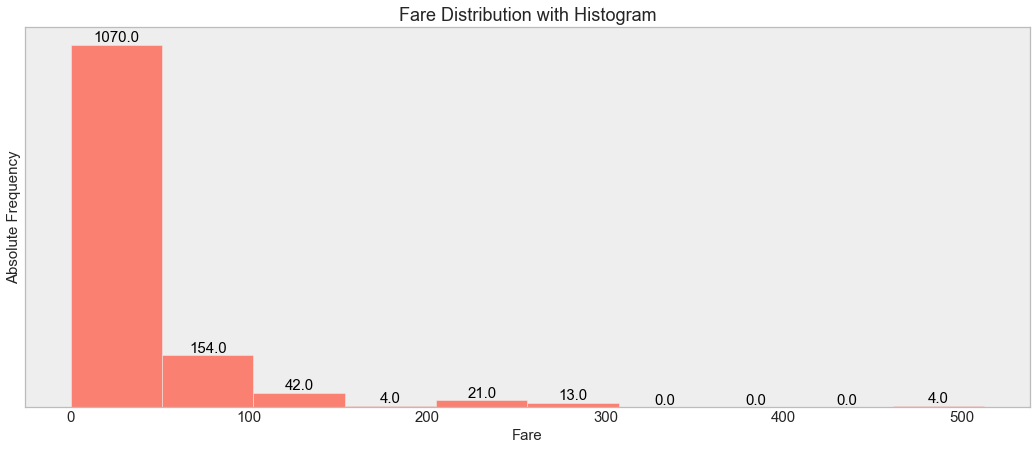

In [49]:
'''Plot histogram of Fare.'''
histogram(merged.Fare)

In [52]:
merged.Fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

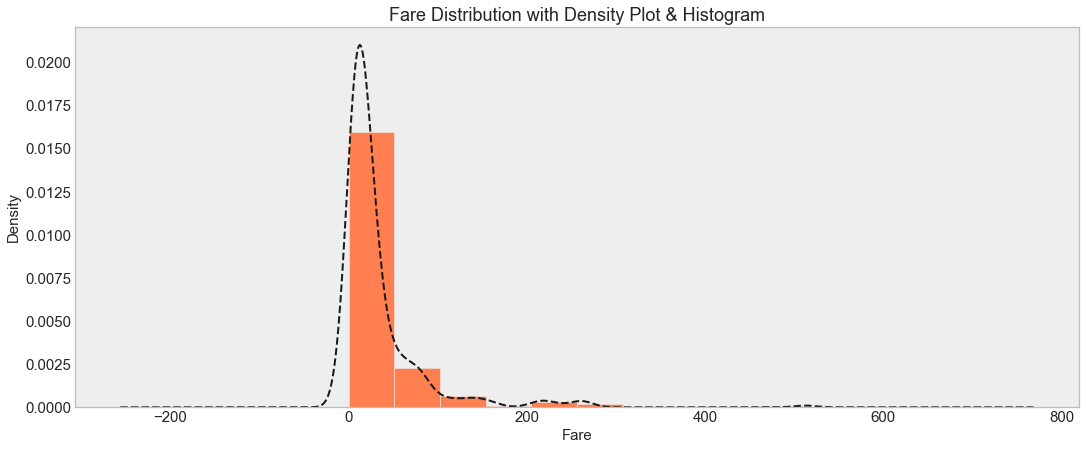

In [53]:
density_plot(merged.Fare)

In [54]:
summary_stats(merged.Fare)

,Fare
Stats,
skewness,4.367709
count,1308.000000
mean,33.295479
std,51.758668
min,0.000000
25%,7.895800
50%,14.454200
75%,31.275000
max,512.329200


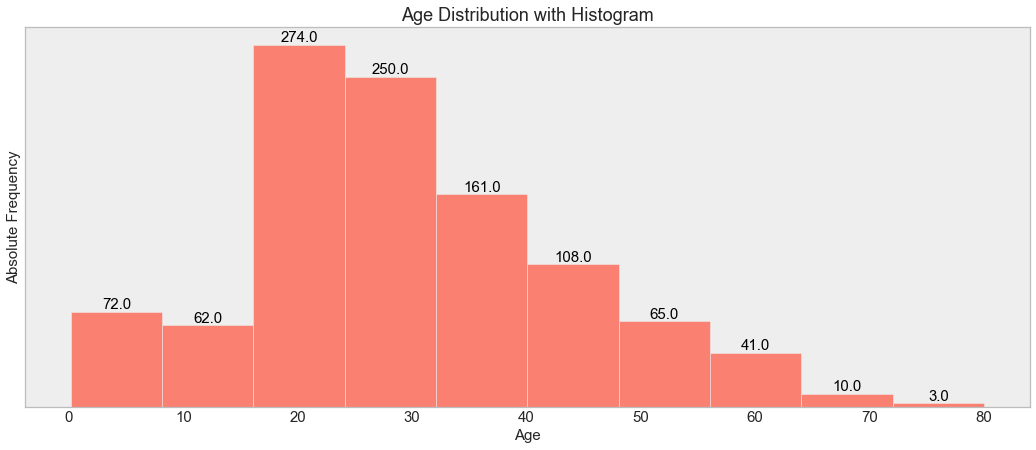

In [55]:
histogram(merged.Age)

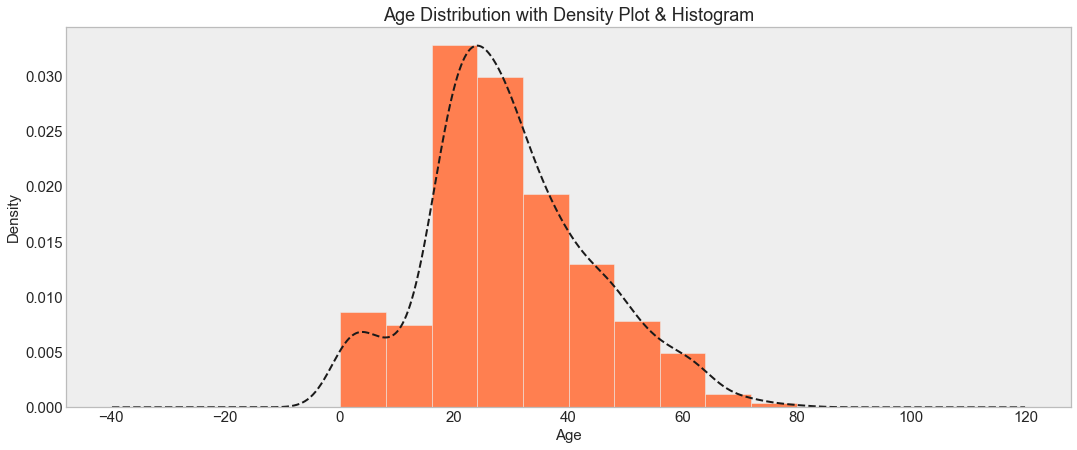

,Age
Stats,
skewness,0.407675
count,1046.000000
mean,29.881138
std,14.413493
min,0.170000
25%,21.000000
50%,28.000000
75%,39.000000
max,80.000000


In [57]:
density_plot(merged.Age)
summary_stats(merged.Age)

# Feature Engineer

X    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

Absolute & Relative Frequency of Cabin :


,Absolute Frequency,Relative Frequency(%)
X,1014,77.46
C,94,7.18
B,65,4.97
D,46,3.51
E,41,3.13
A,22,1.68
F,21,1.60
G,5,0.38
T,1,0.08


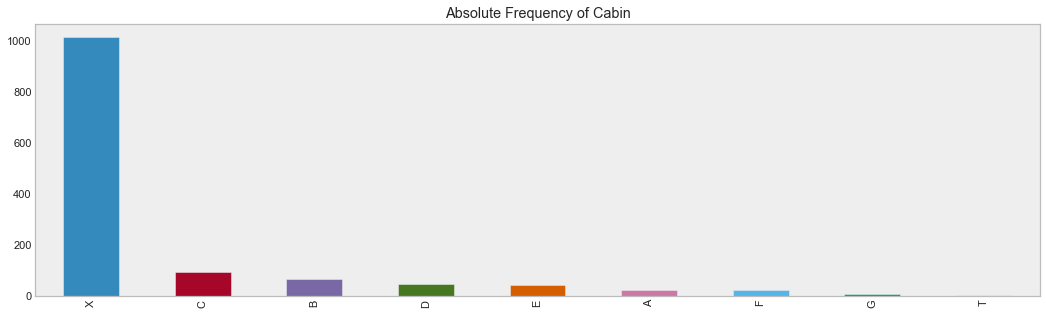

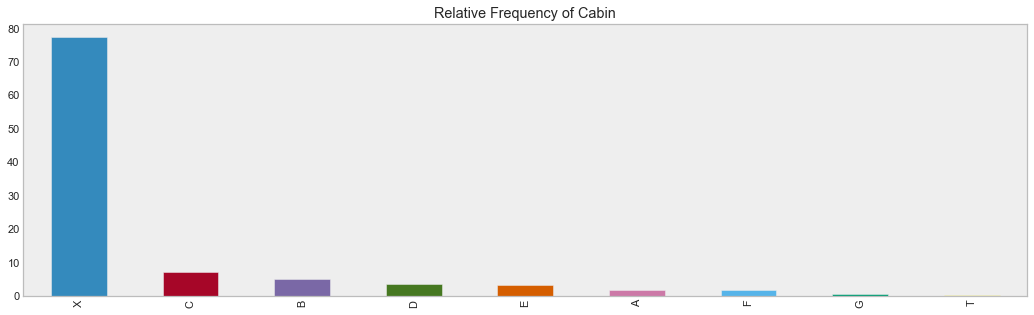

In [61]:
merged.Cabin.fillna(value = 'X', inplace = True)
merged.Cabin = merged.Cabin.apply( lambda x : x[0])
display(merged.Cabin.value_counts())

'''After processing, we can visualize the absolute and relative frequency of newly transformed Cabin variable.'''
absolute_and_relative_freq(merged.Cabin)

In [62]:
'''Create a new variable Title that extracts titles from Name.'''
merged['Title'] = merged.Name.str.extract('([A-Za-z]+)\.')

'''Count the extracted categories of Title from Name.'''
display(merged.Title.value_counts())

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Major         2
Mlle          2
Ms            2
Dona          1
Jonkheer      1
Don           1
Mme           1
Countess      1
Sir           1
Capt          1
Lady          1
Name: Title, dtype: int64

In [73]:
merged.Title

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
5          Mr
6          Mr
7      Master
8         Mrs
9         Mrs
10       Miss
11       Miss
12         Mr
13         Mr
14       Miss
15        Mrs
16     Master
17         Mr
18        Mrs
19        Mrs
20         Mr
21         Mr
22       Miss
23         Mr
24       Miss
25        Mrs
26         Mr
27         Mr
28       Miss
29         Mr
        ...  
388        Mr
389    Master
390        Mr
391       Mrs
392    Master
393        Mr
394        Mr
395       Mrs
396        Mr
397       Mrs
398        Mr
399        Mr
400      Miss
401        Mr
402      Miss
403        Mr
404        Mr
405        Mr
406        Mr
407        Mr
408      Miss
409      Miss
410      Miss
411       Mrs
412      Miss
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Title, Length: 1309, dtype: object

Absolute & Relative Frequency of Title :


,Absolute Frequency,Relative Frequency(%)
Mr,757,57.83
Miss,264,20.17
Mrs,198,15.13
Master,61,4.66
Officer,23,1.76
Aristocrat,6,0.46


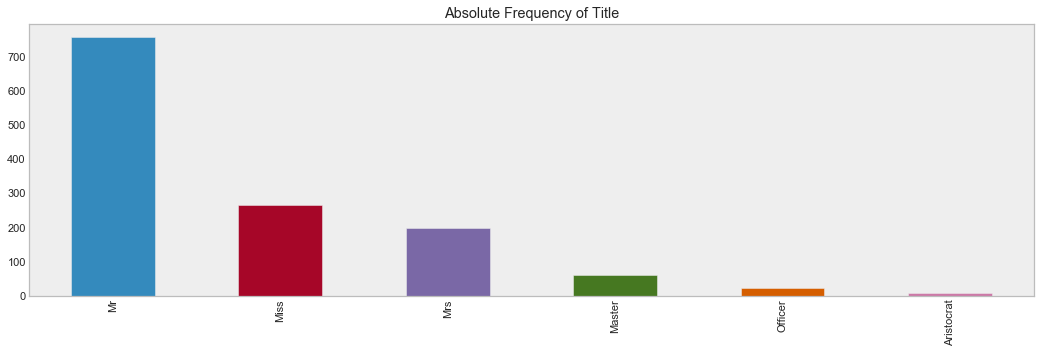

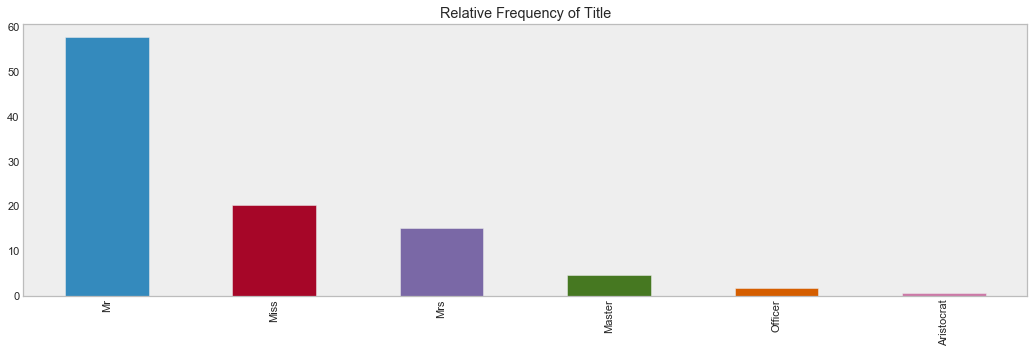

In [74]:
'''Create a bucket Officer and put Dr, Rev, Col, Major, Capt titles into it.'''
merged.Title.replace(to_replace = ['Dr', 'Rev', 'Col', 'Major', 'Capt'], value = 'Officer', inplace = True)

'''Put Dona, Jonkheer, Countess, Sir, Lady, Don in bucket Aristocrat.'''
merged.Title.replace(to_replace = ['Dona', 'Jonkheer', 'Countess', 'Sir', 'Lady', 'Don'], value = 'Aristocrat', inplace = True)

'''Finally Replace Mlle and Ms with Miss. And Mme with Mrs.'''
merged.Title.replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'}, inplace = True)

'''After processing, visualise and count absolute and relative frequency of transformed Title.'''
absolute_and_relative_freq(merged.Title)

In [75]:
'''Merge SibSp and Parch to create a variable Family_size.'''
merged['Family_size'] = merged.SibSp + merged.Parch + 1  # Adding 1 for single person
display(merged.Family_size.value_counts())

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: Family_size, dtype: int64

Absolute & Relative Frequency of Family_size :


,Absolute Frequency,Relative Frequency(%)
single,790,60.35
small,394,30.10
medium,65,4.97
large,60,4.58


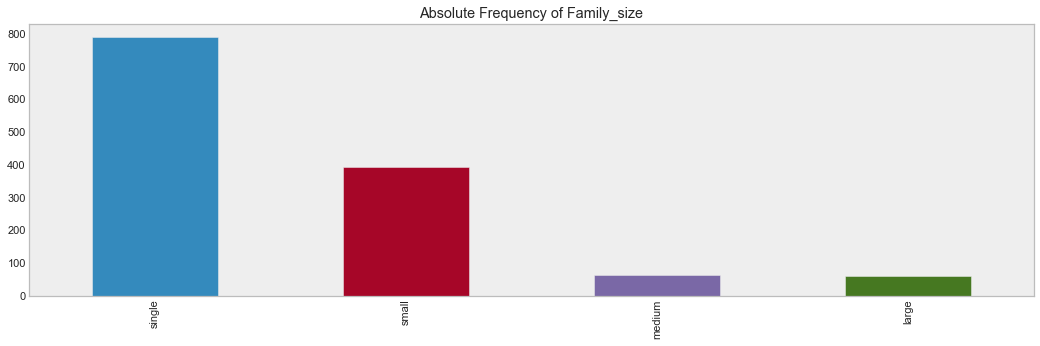

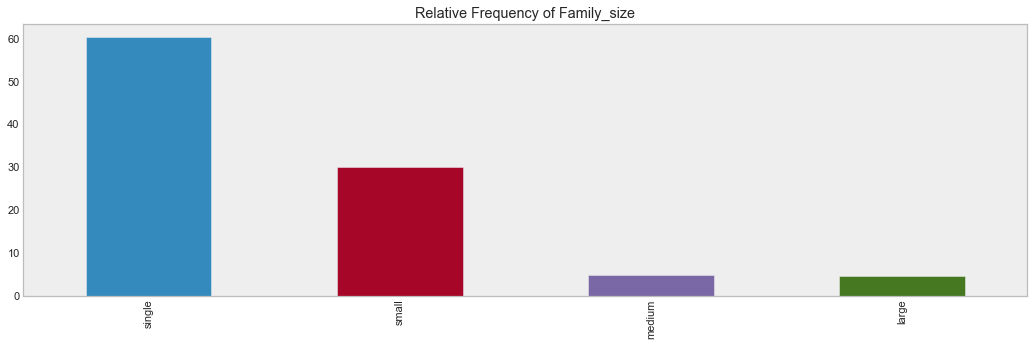

In [77]:
'''Create buckets of single, small, medium, and large and then put respective values into them.'''
merged.Family_size.replace(to_replace = [1], value = 'single', inplace = True)
merged.Family_size.replace(to_replace = [2,3], value = 'small', inplace = True)
merged.Family_size.replace(to_replace = [4,5], value = 'medium', inplace = True)
merged.Family_size.replace(to_replace = [6, 7, 8, 11], value = 'large', inplace = True)

'''After processing, visualise and count the absolute and relative frequency of engineered Family_size.'''
absolute_and_relative_freq(merged.Family_size)

In [86]:
ticket = []
for x in list(merged.Ticket):
    if x.isdigit():
        ticket.append('N')
    else:
        ticket.append(x.replace('.','').replace('/','').strip().split(' ')[0])
'''Swap values'''
merged.Ticket = ticket

'''Count the categories in Ticket.'''
display(merged.Ticket.value_counts())

N          957
PC          92
CA          68
A5          28
SOTONOQ     24
WC          15
STONO       14
SCPARIS     14
A4          10
FCC          9
C            8
SOC          8
STONO2       7
SOPP         7
SCParis      5
SCAH         5
PP           4
WEP          4
LINE         4
SOTONO2      3
FC           3
SWPP         2
SCA4         2
PPP          2
SC           2
A            1
SP           1
Fa           1
AS           1
SCA3         1
STONOQ       1
SOP          1
LP           1
AQ4          1
SCOW         1
CASOTON      1
AQ3          1
Name: Ticket, dtype: int64

In [87]:
'''Create a function to count total outliers. And plot variables with and without outliers.'''
def outliers(variable):
    global filtered
    # Calculate 1st, 3rd quartiles and iqr.
    q1, q3 = variable.quantile(0.25), variable.quantile(0.75)
    iqr = q3 - q1
    
    # Calculate lower fence and upper fence for outliers
    l_fence, u_fence = q1 - 1.5*iqr , q3 + 1.5*iqr   # Any values less than l_fence and greater than u_fence are outliers.
    
    # Observations that are outliers
    outliers = variable[(variable<l_fence) | (variable>u_fence)]
    print('Total Outliers of', variable.name,':', outliers.count())
    
    # Drop obsevations that are outliers
    filtered = variable.drop(outliers.index, axis = 0)

    # Create subplots
    out_variables = [variable, filtered]
    out_titles = [' Distribution with Outliers', ' Distribution Without Outliers']
    title_size = 25
    font_size = 18
    plt.figure(figsize = (25, 15))
    for ax, outlier, title in zip(range(1,3), out_variables, out_titles):
        plt.subplot(2, 1, ax)
        sns.boxplot(outlier).set_title('%s' %outlier.name + title, fontsize = title_size)
        plt.xticks(fontsize = font_size)
        plt.xlabel('%s' %outlier.name, fontsize = font_size)

Total Outliers of Age : 9


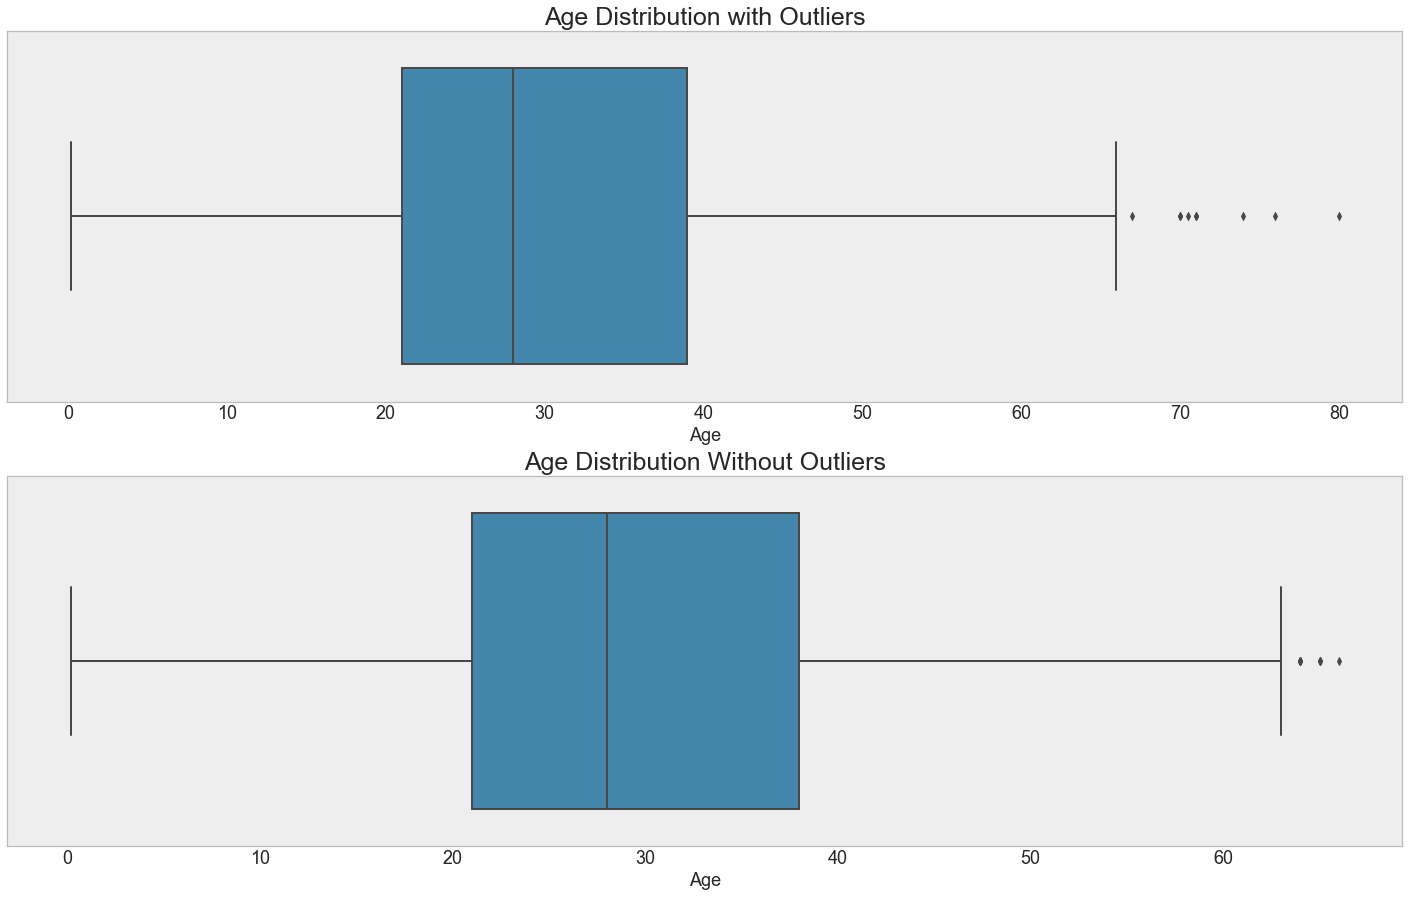

In [88]:
outliers(merged.Age)

Total Outliers of Fare : 171


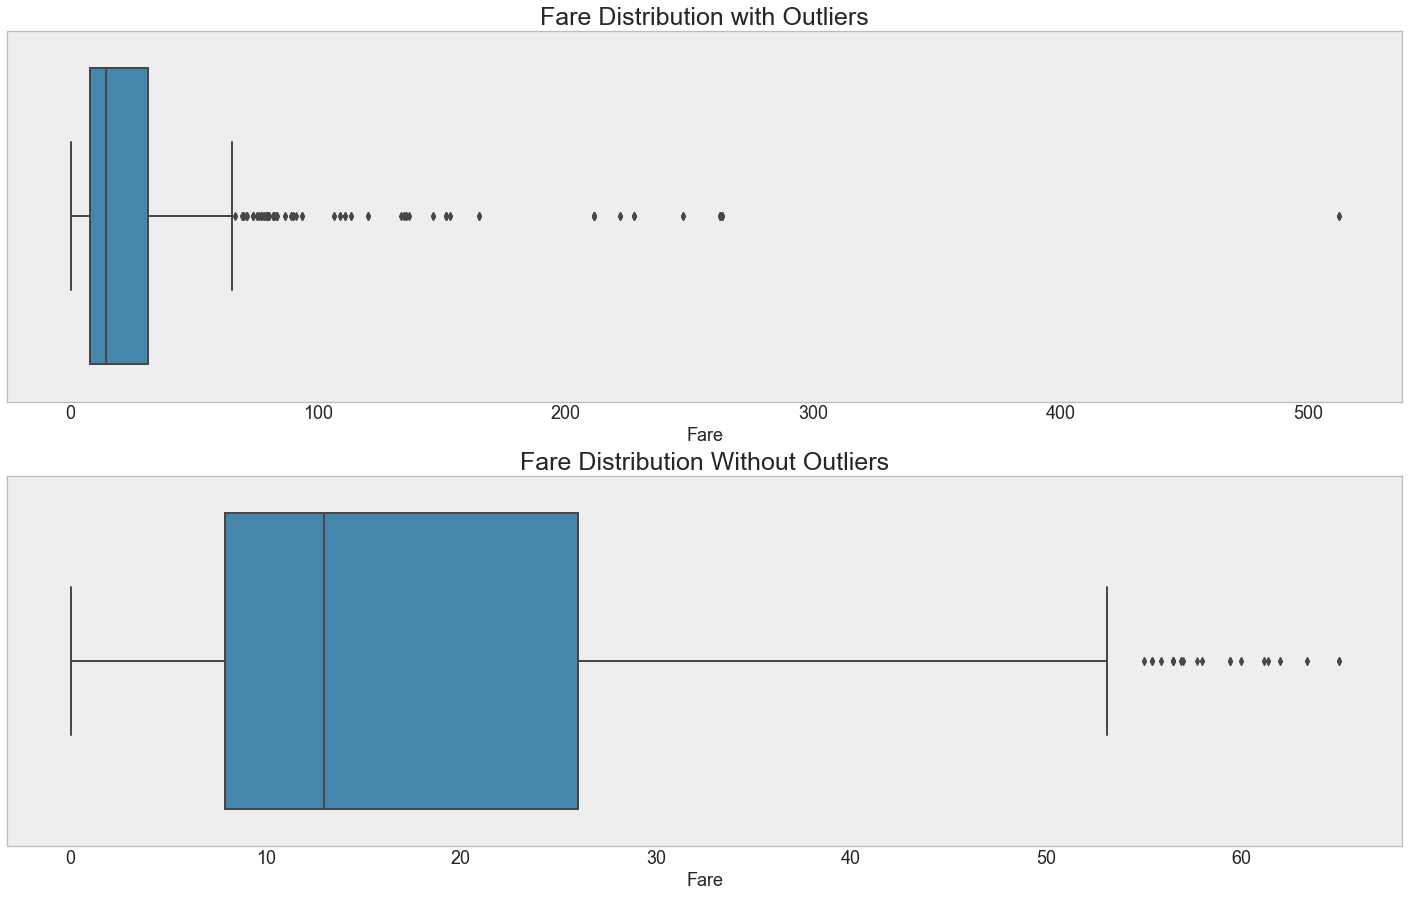

In [89]:
outliers(merged.Fare)

In [127]:
merged

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Title,Family_size,Age_binned,Fare_binned
0,1,0.0,3,male,1,0,A5,X,S,Mr,small,young_adult,low
1,2,1.0,1,female,1,0,PC,C,C,Mrs,small,adult,low
2,3,1.0,3,female,0,0,STONO2,X,S,Miss,single,young_adult,low
3,4,1.0,1,female,1,0,N,C,S,Mrs,small,young_adult,low
4,5,0.0,3,male,0,0,N,X,S,Mr,single,young_adult,low
5,6,0.0,3,male,0,0,N,X,Q,Mr,single,young_adult,low
6,7,0.0,1,male,0,0,N,E,S,Mr,single,adult,low
7,8,0.0,3,male,3,1,N,X,S,Master,medium,infant,low
8,9,1.0,3,female,0,2,N,X,S,Mrs,small,young_adult,low
9,10,1.0,2,female,1,0,N,X,C,Mrs,small,teenager,low


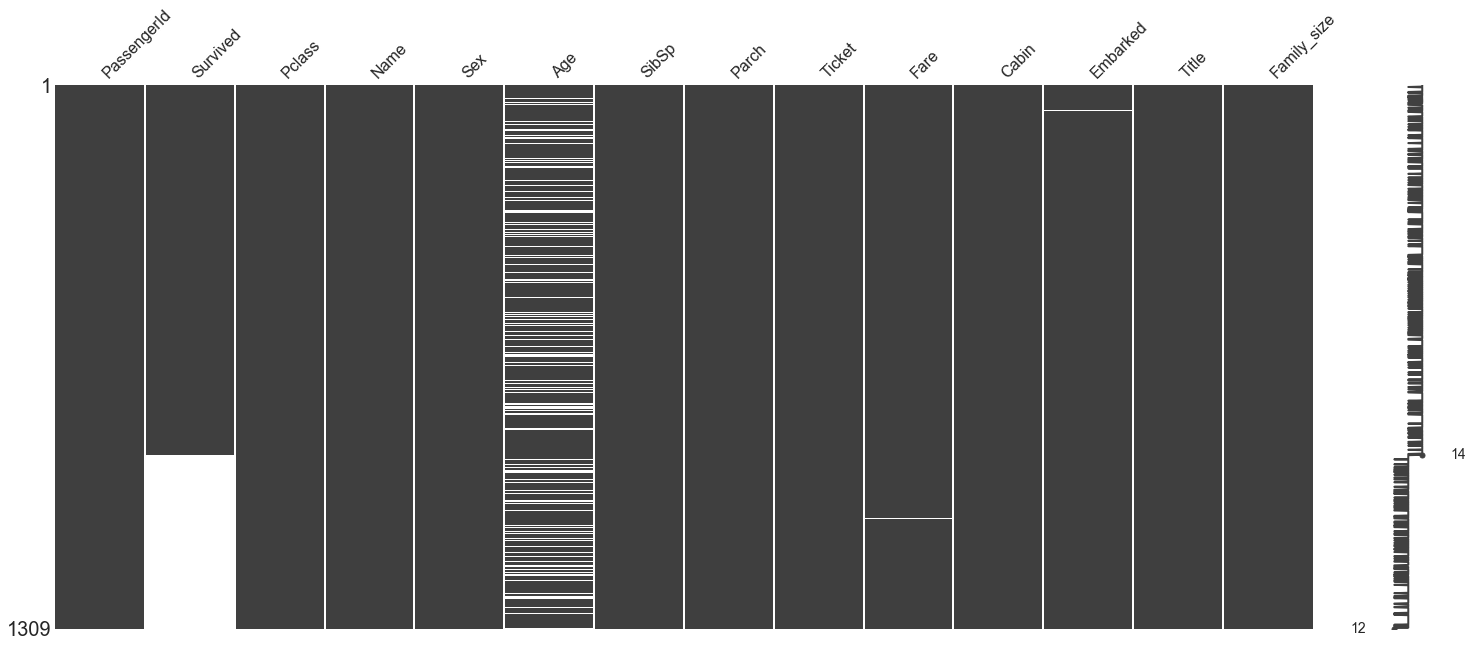

In [90]:
mn.matrix(merged)

In [91]:
display(merged.isnull().sum())

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         2
Title            0
Family_size      0
dtype: int64

In [92]:
'''Impute missing values of Embarked. Embarked is a categorical variable where S is the most frequent.'''
merged.Embarked.fillna(value = 'S', inplace = True)

'''Impute missing values of Fare. Fare is a numerical variable with outliers. Hence it will be imputed by median.'''
merged.Fare.fillna(value = merged.Fare.median(), inplace = True)

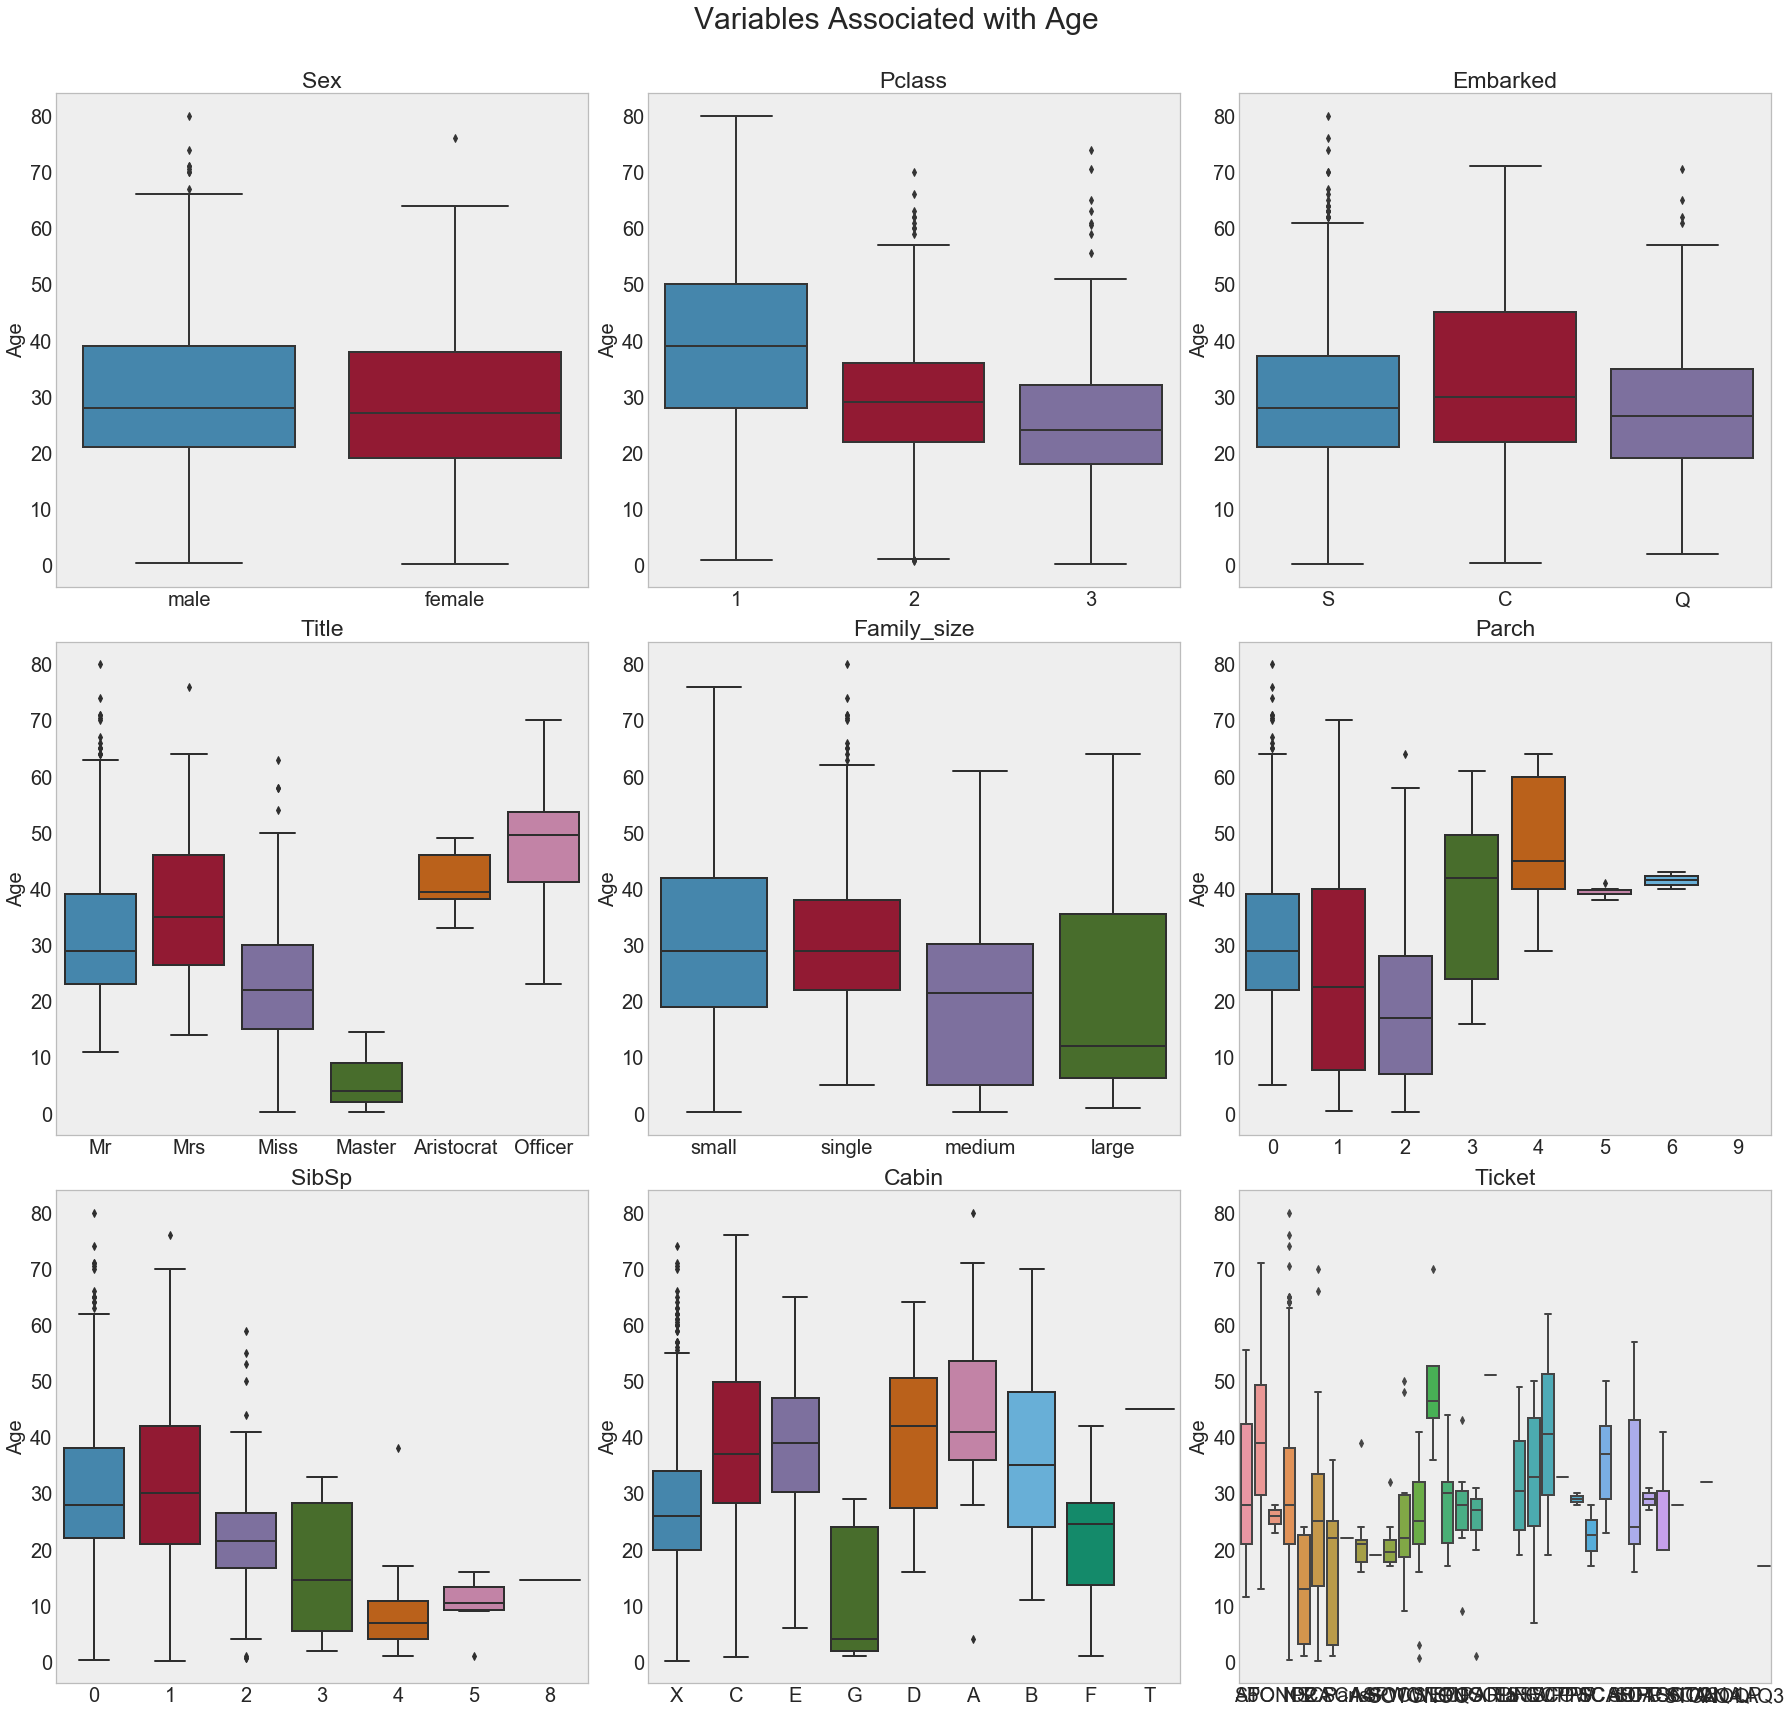

In [93]:
"""Create a boxplot to view the variables correlated with Age. First extract the variables we're interested in."""
correlation = merged.loc[:, ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_size', 'Parch', 'SibSp', 'Cabin', 'Ticket']]
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (25,25))
for ax, column in zip(axes.flatten(), correlation.columns):
    sns.boxplot(x = correlation[column], y =  merged.Age, ax = ax)
    ax.set_title(column, fontsize = 23)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 20)
    ax.set_ylabel('Age', fontsize = 20)
    ax.set_xlabel('')
fig.suptitle('Variables Associated with Age', fontsize = 30)
fig.tight_layout(rect = [0, 0.03, 1, 0.95])

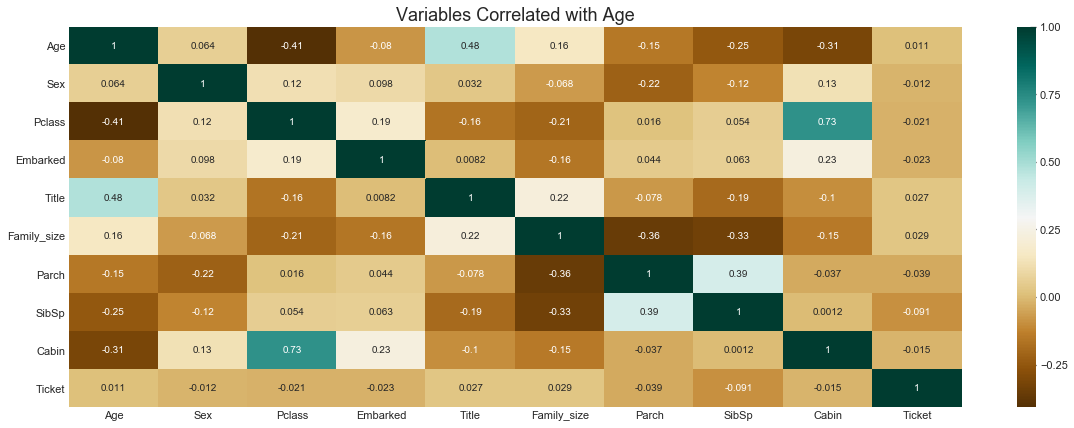

In [94]:
from sklearn.preprocessing import LabelEncoder
correlation = correlation.agg(LabelEncoder().fit_transform)
correlation['Age'] = merged.Age # Inserting Age in variable correlation.
correlation = correlation.set_index('Age').reset_index() # Move Age at index 0.

'''Now create the heatmap correlation.'''
plt.figure(figsize = (20,7))
sns.heatmap(correlation.corr(), cmap ='BrBG', annot = True)
plt.title('Variables Correlated with Age', fontsize = 18)
plt.show()

In [102]:
merged.Age = merged.groupby(['Title', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

In [118]:
merged.Age.describe()

count    1309.000000
mean       29.267892
std        13.448982
min         0.170000
25%        21.000000
50%        26.000000
75%        36.500000
max        80.000000
Name: Age, dtype: float64

1. Numerical & Numerical: Pearson's correlation, or Spearman correlation (doesn't require normal distribution).
2. Numerical & Categorical: Point biserial correlation (only  if categorical variable is binary type), or ANOVA test. For this problem, you can use either biserial correlation or ANOVA. But I will perform both test just to learn because ANOVA will come in handy if categorical variable has more than two groups.
3. Categorical & Categorical: We would use Chi-square test for bivariate analysis between categorical variables.

In [104]:
"""Let's split the train and test data for bivariate analysis since test data has no Survived values. We need our target variable without missing values to conduct the association test with predictor variables."""
df_train = merged.iloc[:891, :]
df_test = merged.iloc[891:, :]
df_test = df_test.drop(columns = ['Survived'], axis = 1)

'''#1.Create a function that creates boxplot between categorical and numerical variables and calculates biserial correlation.'''
def boxplot_and_correlation(cat,num):
    '''cat = categorical variable, and num = numerical variable.'''
    plt.figure(figsize = (18,7))
    title_size = 18
    font_size = 15
    ax = sns.boxplot(x = cat, y = num)
    
    # Select boxes to change the color
    box = ax.artists[0]
    box1 = ax.artists[1]
    
    # Change the appearance of that box
    box.set_facecolor('red')
    box1.set_facecolor('green')
    plt.title('Association between Survived & %s' %num.name, fontsize = title_size)
    plt.xlabel('%s' %cat.name, fontsize = font_size)
    plt.ylabel('%s' %num.name, fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.show()
    print('Correlation between', num.name, 'and', cat.name,':', stats.pointbiserialr(num, cat))

'''#2.Create another function to calculate mean when grouped by categorical variable. And also plot the grouped mean.'''
def nume_grouped_by_cat(num, cat):
    global ax
    font_size = 15
    title_size = 18
    grouped_by_cat = num.groupby(cat).mean().sort_values( ascending = False)
    grouped_by_cat.rename ({1:'survived', 0:'died'}, axis = 'rows', inplace = True) # Renaming index
    grouped_by_cat = round(grouped_by_cat, 2)
    ax = grouped_by_cat.plot.bar(figsize = (18,5)) 
    abs_bar_labels()
    plt.title('Mean %s ' %num.name + ' of Survivors vs Victims', fontsize = title_size)
    plt.ylabel('Mean ' + '%s' %num.name, fontsize = font_size)
    plt.xlabel('%s' %cat.name, fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.show()

'''#3.This function plots histogram of numerical variable for every class of categorical variable.'''
def num_hist_by_cat(num,cat):
    font_size = 15
    title_size = 18
    plt.figure(figsize = (18,7))
    num[cat == 1].hist(color = ['g'], label = 'Survived', grid = False)
    num[cat == 0].hist(color = ['r'], label = 'Died', grid = False)
    plt.yticks([])
    plt.xticks(fontsize = font_size)
    plt.xlabel('%s' %num.name, fontsize = font_size)
    plt.title('%s ' %num.name + ' Distribution of Survivors vs Victims', fontsize = title_size)
    plt.legend()
    plt.show()
   
'''#4.Create a function to calculate anova between numerical and categorical variable.'''
def anova(num, cat):
    from scipy import stats
    grp_num_by_cat_1 = num[cat == 1] # Group our numerical variable by categorical variable(1). Group Fair by survivors
    grp_num_by_cat_0 = num[cat == 0] # Group our numerical variable by categorical variable(0). Group Fare by victims
    f_val, p_val = stats.f_oneway(grp_num_by_cat_1, grp_num_by_cat_0) # Calculate f statistics and p value
    print('Anova Result between ' + num.name, ' & '+ cat.name, ':' , f_val, p_val)  
    
'''#5.Create another function that calculates Tukey's test between our nemurical and categorical variable.'''
def tukey_test(num, cat):
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    tukey = pairwise_tukeyhsd(endog = num,   # Numerical data
                             groups = cat,   # Categorical data
                             alpha = 0.05)   # Significance level
    
    summary = tukey.summary()   # See test summary
    print("Tukey's Test Result between " + num.name, ' & '+ cat.name, ':' )  
    display(summary)       

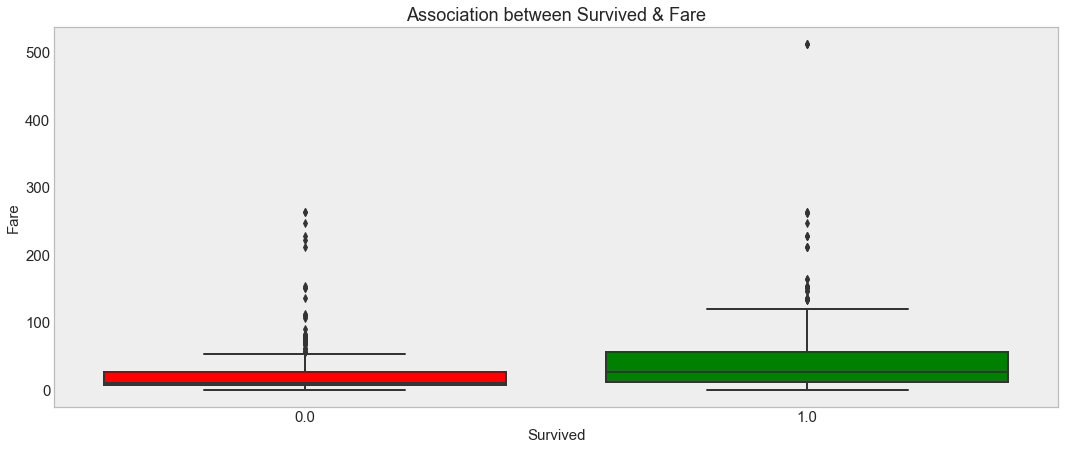

Correlation between Fare and Survived : PointbiserialrResult(correlation=0.25730652238496243, pvalue=6.1201893419218733e-15)


In [105]:
'''Create a boxplot to visualize the strength of association of Survived with Fare. Also calculate biserial correlation.'''
boxplot_and_correlation(df_train.Survived, df_train.Fare)

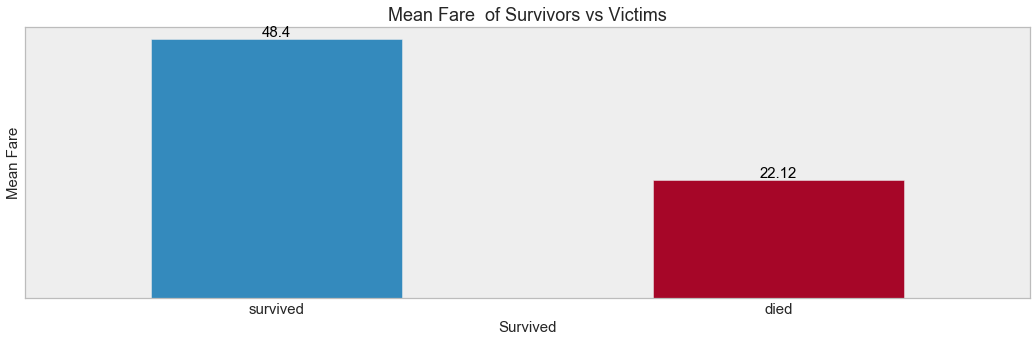

In [106]:
'''So the mean fare of survivors should be much more (positive correlation or boxplot interpretation) than those who died. Calculate mean fare paid by the survivors as well as by the victims.'''
nume_grouped_by_cat(df_train.Fare, df_train.Survived)

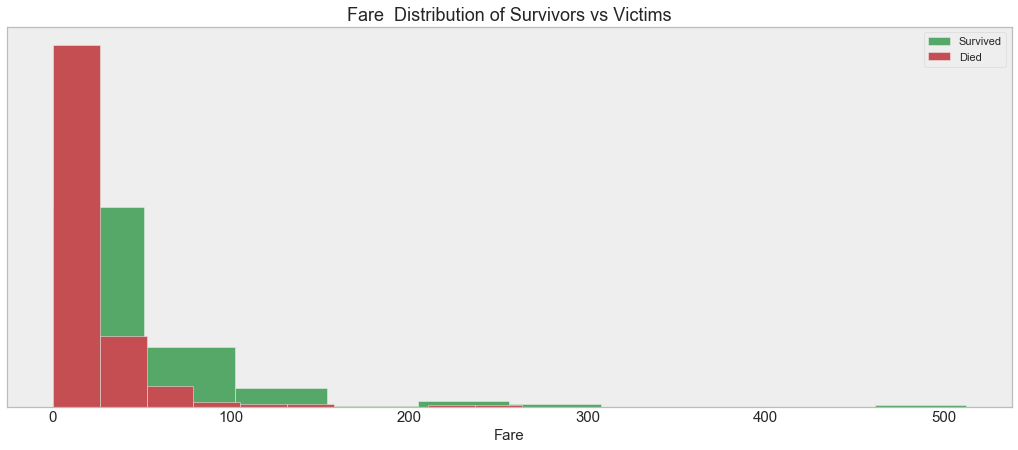

In [107]:
"""Plot histogram of survivor's vs victims fare."""
num_hist_by_cat(df_train.Fare, df_train.Survived)

In [108]:
"""Let's perform ANOVA between Fare and Survived. One can omit this step. I perform just to show how anova is performed if there were more than two groups in our categorical variable."""
anova(df_train.Fare, df_train.Survived)

Anova Result between Fare  & Survived : 63.030764228 6.12018934192e-15


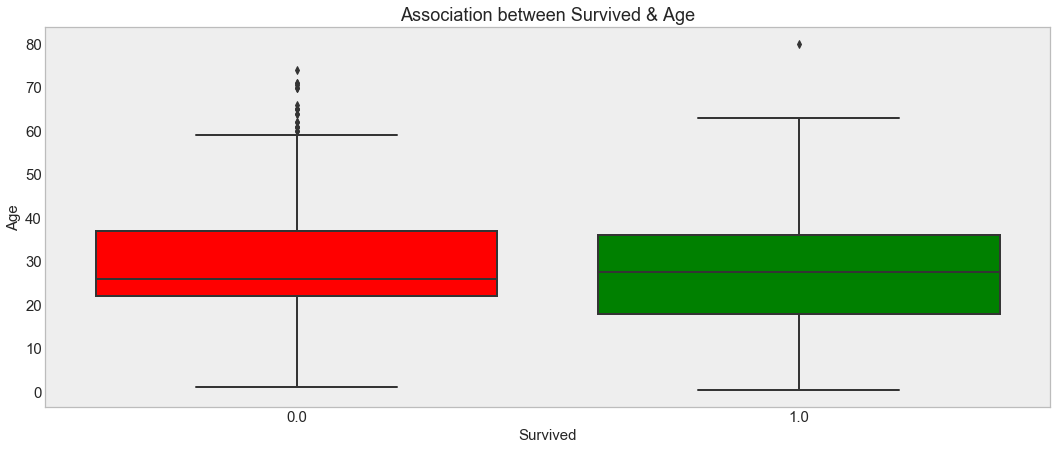

Correlation between Age and Survived : PointbiserialrResult(correlation=-0.05953689941956393, pvalue=0.075694190961800384)


In [109]:
"""Let's create a box plot between Age and Survived to have an idea by how much Age is associated with Survived. Also find point biserial correlation between them."""
boxplot_and_correlation(df_train.Survived, df_train.Age)

In [110]:

def crosstab(cat, cat_target):
    '''cat = categorical variable, cat_target = our target categorical variable.'''
    global ax, ax1
    fig_size = (18, 5)
    title_size = 18
    font_size = 15
    cat_grouped_by_cat_target = pd.crosstab(index = cat, columns = cat_target)
    cat_grouped_by_cat_target.rename({0:'Victims', 1:'Survivors'}, axis = 'columns', inplace = True)  # Renaming the columns
    pct_cat_grouped_by_cat_target = round(pd.crosstab(index = cat, columns = cat_target, normalize = 'index')*100, 2)
    pct_cat_grouped_by_cat_target.rename({0:'Victims(%)', 1:'Survivors(%)'}, axis = 'columns', inplace = True)
    
    # Plot absolute frequency of Survived by a categorical variable
    ax =  cat_grouped_by_cat_target.plot.bar(color = ['r', 'g'], title = 'Absolute Count of Survival and Death by %s' %cat.name, figsize = fig_size)
    ax.title.set_size(fontsize = title_size)
    abs_bar_labels()
    plt.xlabel(cat.name, fontsize = font_size)
    plt.show()
    
    # Plot relative frequrncy of Survived by a categorical variable
    ax1 = pct_cat_grouped_by_cat_target.plot.bar(color = ['r', 'g'], title = 'Percentage Count of Survival and Death by %s' %cat.name, figsize = fig_size)
    ax1.title.set_size(fontsize = title_size)
    pct_bar_labels()
    plt.xlabel(cat.name, fontsize = font_size)
    plt.show()
    
'''#2.Create a function to calculate chi_square test between a categorical and target categorical variable.'''
def chi_square(cat, cat_target):
    cat_grouped_by_cat_target = pd.crosstab(index = cat, columns = cat_target)
    test_result = stats.chi2_contingency (cat_grouped_by_cat_target)
    print('Chi Square Test Result between Survived & %s' %cat.name + ':')
    display(test_result)

'''#3.Finally create another function to calculate Bonferroni-adjusted pvalue for a categorical and target categorical variable.'''
def bonferroni_adjusted(cat, cat_target):
    dummies = pd.get_dummies(cat)
    for columns in dummies:
        crosstab = pd.crosstab(dummies[columns], cat_target)
        print(stats.chi2_contingency(crosstab))
    print('\nColumns:', dummies.columns)

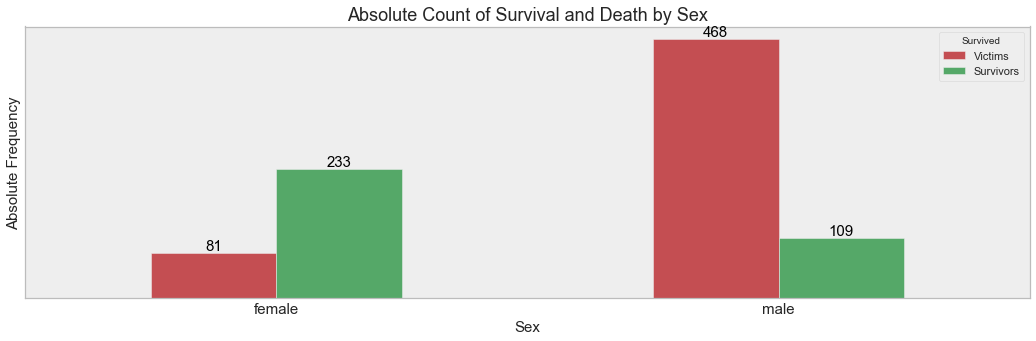

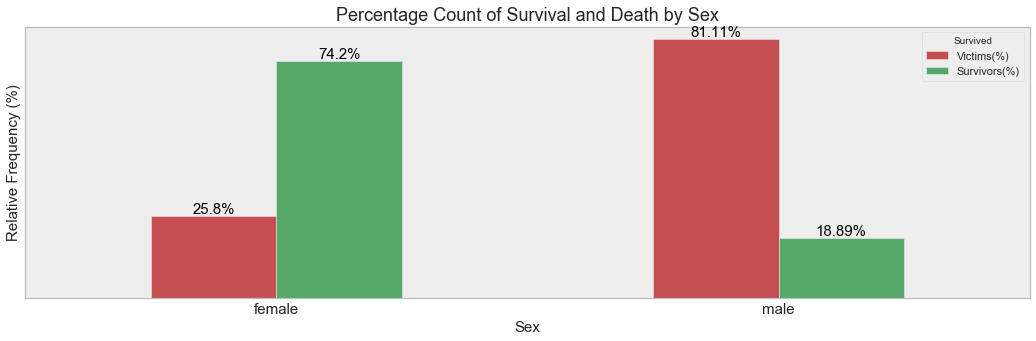

In [111]:
'''Plot the no of passergers who survived and died due to their sex in absolute and relative scale.'''
crosstab(df_train.Sex, df_train.Survived)

In [112]:
'''Perform chi-square test of independence between Survived and Sex.'''
chi_square(df_train.Sex, df_train.Survived)

Chi Square Test Result between Survived & Sex:


(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[ 193.47474747,  120.52525253],
        [ 355.52525253,  221.47474747]]))

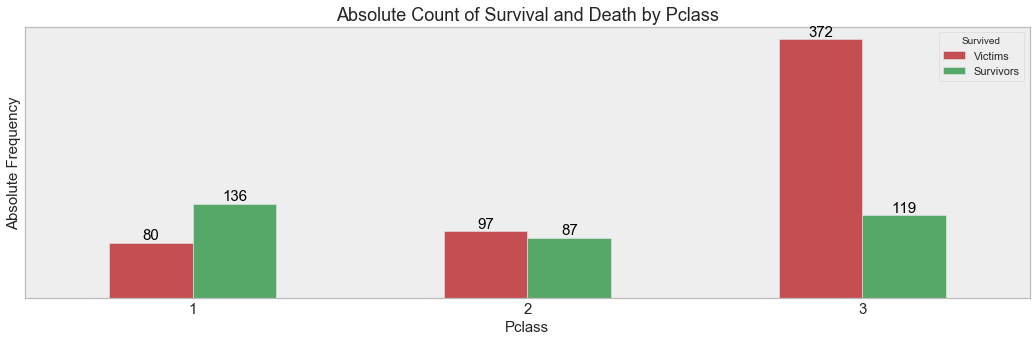

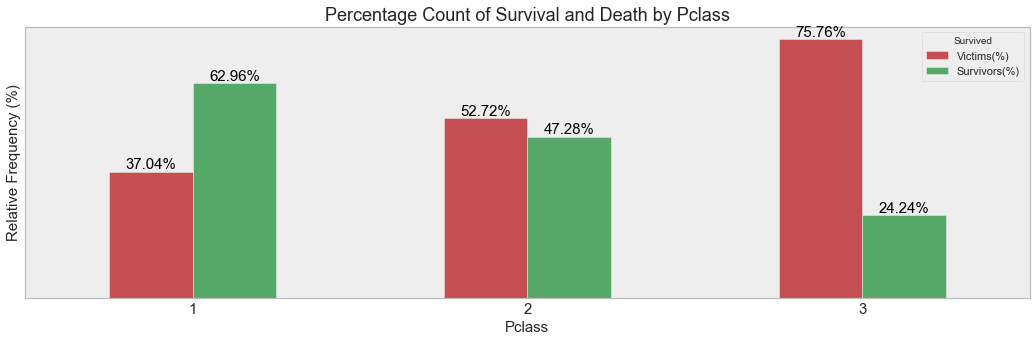

In [113]:
'''Plot the number of passengers who survived and died due to their pclass in absolute and relative scale.'''
crosstab(df_train.Pclass, df_train.Survived)

In [114]:
'''Perform chi-square test of independence between Survived and Pclass.'''
chi_square(df_train.Pclass, df_train.Survived)

Chi Square Test Result between Survived & Pclass:


(102.88898875696056,
 4.5492517112987927e-23,
 2,
 array([[ 133.09090909,   82.90909091],
        [ 113.37373737,   70.62626263],
        [ 302.53535354,  188.46464646]]))

In [115]:
'''Create a function that plots the impact of 3 predictor variables at a time on a target variable.'''
def multivariate_analysis(cat1, cat2, cat3, cat_target):
    font_size = 15
    grouped = round(pd.crosstab(index = [cat1, cat2, cat3], columns = cat_target, normalize = 'index')*100, 2)
    grouped.rename({0:'Died%', 1:'Survived%'}, axis = 1, inplace = True)
    grouped.plot.bar(color = ['r', 'g'], figsize = (18,5))
    plt.xlabel(cat1.name + ',' + cat2.name + ',' + cat3.name, fontsize = font_size)
    plt.ylabel('Relative Frequency (%)', fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.legend(loc = 'best')
    plt.show()

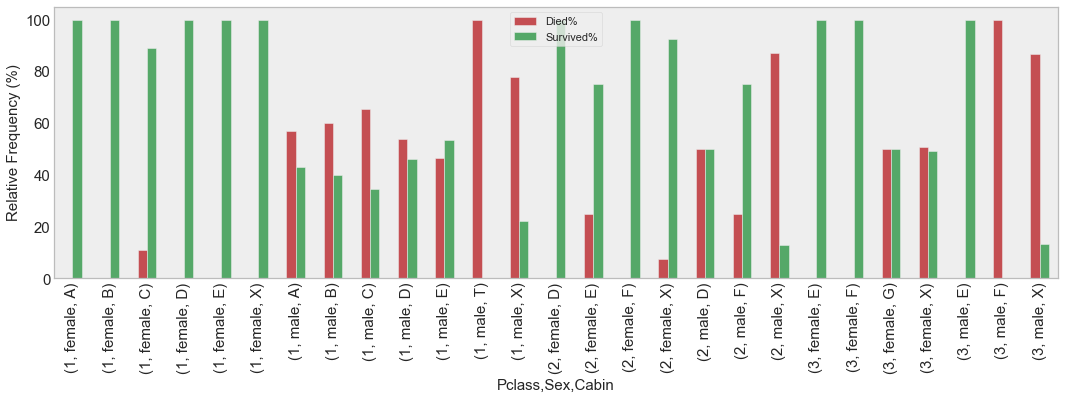

In [117]:
'''Proportion of survivors and victims due to pclass, sex, and cabin.'''
multivariate_analysis(df_train.Pclass, df_train.Sex, df_train.Cabin, df_train.Survived)

# Data Transformation

In [120]:
'''Create bin categories for Age.'''
label_names = ['infant','child','teenager','young_adult','adult','aged']

'''Create range for each bin categories of Age.'''
cut_points = [0,5,12,18,35,60,81]

'''Create and view categorized Age with original Age.'''
merged['Age_binned'] = pd.cut(merged.Age, cut_points, labels = label_names)

display(merged[['Age', 'Age_binned']].head(2))

,Age,Age_binned
0,22.0,young_adult
1,38.0,adult


In [122]:
'''Create bin categories for Fare.'''
groups = ['low','medium','high','very_high']

'''Create range for each bin categories of Fare.'''
cut_points = [-1, 130, 260, 390, 520]

'''Create and view categorized Fare with original Fare.'''
merged['Fare_binned'] = pd.cut(merged.Fare, cut_points, labels = groups)

display(merged[['Fare', 'Fare_binned']].head(2))

,Fare,Fare_binned
0,7.2500,low
1,71.2833,low


In [124]:
"""Let's see all the variables we currently have with their category."""
display(merged.head(2))

'''Drop the features that would not be useful anymore.'''
merged.drop(columns = ['Name', 'Age', 'Fare'], inplace = True, axis = 1)

'''Features after dropping.'''

display(merged.columns)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_size,Age_binned,Fare_binned
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A5,7.2500,X,S,Mr,small,young_adult,low
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC,71.2833,C,C,Mrs,small,adult,low


Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Ticket',
       'Cabin', 'Embarked', 'Title', 'Family_size', 'Age_binned',
       'Fare_binned'],
      dtype='object')

In [129]:
'''Correcting data types, converting into categorical variables.'''
merged.loc[:, ['Pclass', 'Sex', 'Embarked', 'Cabin', 'Title', 'Family_size', 'Ticket']] = merged.loc[:, ['Pclass', 'Sex', 'Embarked', 'Cabin', 'Title', 'Family_size', 'Ticket']].astype('category')

'''Due to merging there are NaN values in Survived for test set observations.'''
merged.Survived = merged.Survived.dropna().astype('int')#Converting without dropping NaN throws an error.

'''Check if data types have been corrected.'''

display(merged.dtypes)

PassengerId       int64
Survived          int64
Pclass         category
Sex            category
SibSp             int64
Parch             int64
Ticket         category
Cabin          category
Embarked       category
Title          category
Family_size    category
Age_binned     category
Fare_binned    category
dtype: object

In [130]:
'''Convert categorical data into numeric to feed our machine learning model.'''
merged = pd.get_dummies(merged)

"""Let's visualize the updated dataset that would be fed to our machine learning algorithms."""
display(merged.head(2))

,PassengerId,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Ticket_A,...,Age_binned_infant,Age_binned_child,Age_binned_teenager,Age_binned_young_adult,Age_binned_adult,Age_binned_aged,Fare_binned_low,Fare_binned_medium,Fare_binned_high,Fare_binned_very_high
0,1,0,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,2,1,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0


In [131]:
'''Set a seed for reproducibility'''
seed = 43

"""Let's split the train and test set to feed machine learning algorithm."""
df_train = merged.iloc[:891, :]
df_test  = merged.iloc[891:, :]

'''Drop passengerid from train set and Survived from test set.'''
df_train = df_train.drop(columns = ['PassengerId'], axis = 1)
df_test = df_test.drop(columns = ['Survived'], axis = 1)

'''Extract data sets as input and output for machine learning models.'''
X_train = df_train.drop(columns = ['Survived'], axis = 1) # Input matrix as pandas dataframe (dim:891*47).
y_train = df_train['Survived'] # Output vector as pandas series (dim:891*1)

"""Extract test set"""
X_test  = df_test.drop("PassengerId", axis = 1).copy()

'''See the dimensions of input and output data set.'''
print('Input Matrix Dimension:  ', X_train.shape)
print('Output Vector Dimension: ', y_train.shape)
print('Test Data Dimension:     ', X_test.shape)

Input Matrix Dimension:   (891, 76)
Output Vector Dimension:  (891,)
Test Data Dimension:      (418, 76)


In [135]:

'''Now initialize all the classifiers object.'''
'''#1.Logistic Regression'''
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

'''#2.Support Vector Machines'''
from sklearn.svm import SVC
svc = SVC(gamma = 'auto')

'''#3.Random Forest Classifier'''
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = seed, n_estimators = 100)

'''#4.KNN'''
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

'''#5.Gaussian Naive Bayes'''
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

'''#6.Decision Tree Classifier'''
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = seed)

'''#7.Gradient Boosting Classifier'''
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state = seed)

'''#8.Adaboost Classifier'''
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state = seed)

'''#9.ExtraTrees Classifier'''
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(random_state = seed)

'''#10.Extreme Gradient Boosting'''
from xgboost import XGBClassifier
xgbc = XGBClassifier(random_state = seed)

'''Create a function that returns train accuracy of different models.'''
def train_accuracy(model):
    model.fit(X_train, y_train)
    train_accuracy = model.score(X_train, y_train)
    train_accuracy = np.round(train_accuracy*100, 2)
    return train_accuracy


'''Models with best training accuracy:'''
train_accuracy = pd.DataFrame({'Train_accuracy(%)':[train_accuracy(lr), train_accuracy(svc), train_accuracy(rf), train_accuracy(knn), train_accuracy(gnb), train_accuracy(dt), train_accuracy(gbc), train_accuracy(abc), train_accuracy(etc), train_accuracy(xgbc)]})
train_accuracy.index = ['LR', 'SVC', 'RF', 'KNN', 'GNB', 'DT', 'GBC', 'ABC', 'ETC', 'XGBC']
sorted_train_accuracy = train_accuracy.sort_values(by = 'Train_accuracy(%)', ascending = False)

display(sorted_train_accuracy)


/Users/3arthzneiz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/3arthzneiz/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



,Train_accuracy(%)
RF,91.58
DT,91.58
ETC,91.58
GBC,87.09
XGBC,86.08
KNN,85.41
ABC,84.51
LR,84.18
SVC,82.49
GNB,45.79


In [136]:
'''Create a function that returns mean cross validation score for different models.'''
def x_val_score(model):
    from sklearn.model_selection import cross_val_score
    x_val_score = cross_val_score(model, X_train, y_train, cv = 10, scoring = 'accuracy').mean()
    x_val_score = np.round(x_val_score*100, 2)
    return x_val_score

"""Let's perform k-fold (k=10) cross validation to find the classifier with the best cross validation accuracy."""
x_val_score = pd.DataFrame({'X_val_score(%)':[x_val_score(lr), x_val_score(svc), x_val_score(rf), x_val_score(knn), x_val_score(gnb), x_val_score(dt), x_val_score(gbc), x_val_score(abc), x_val_score(etc), x_val_score(xgbc)]})
x_val_score.index = ['LR', 'SVC', 'RF', 'KNN', 'GNB', 'DT', 'GBC', 'ABC', 'ETC', 'XGBC']
sorted_x_val_score = x_val_score.sort_values(by = 'X_val_score(%)', ascending = False) 
display(sorted_x_val_score)


/Users/3arthzneiz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/3arthzneiz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/3arthzneiz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/3arthzneiz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/3arthzneiz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sil

,X_val_score(%)
GBC,83.17
XGBC,82.49
LR,82.38
ETC,82.17
SVC,82.04
KNN,81.83
ABC,81.60
RF,81.04
DT,81.04
GNB,44.33


In [137]:
"""Define all the models' hyperparameters one by one first::"""

'''Define hyperparameters the logistic regression will be tuned with. For LR, the following hyperparameters are usually tunned.'''
lr_params = {'penalty':['l1', 'l2'],
             'C': np.logspace(0, 4, 10)}

'''For GBC, the following hyperparameters are usually tunned.'''
gbc_params = {'learning_rate': [0.01, 0.02, 0.05, 0.01],
              'max_depth': [4, 6, 8],
              'max_features': [1.0, 0.3, 0.1], 
              'min_samples_split': [ 2, 3, 4],
              'random_state':[seed]}

'''For SVC, the following hyperparameters are usually tunned.'''
svc_params = {'C': [6, 7, 8, 9, 10, 11, 12], 
              'kernel': ['linear','rbf'],
              'gamma': [0.5, 0.2, 0.1, 0.001, 0.0001]}

'''For DT, the following hyperparameters are usually tunned.'''
dt_params = {'max_features': ['auto', 'sqrt', 'log2'],
             'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 
             'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
             'random_state':[seed]}

'''For RF, the following hyperparameters are usually tunned.'''
rf_params = {'criterion':['gini','entropy'],
             'n_estimators':[10, 15, 20, 25, 30],
             'min_samples_leaf':[1, 2, 3],
             'min_samples_split':[3, 4, 5, 6, 7], 
             'max_features':['sqrt', 'auto', 'log2'],
             'random_state':[44]}

'''For KNN, the following hyperparameters are usually tunned.'''
knn_params = {'n_neighbors':[3, 4, 5, 6, 7, 8],
              'leaf_size':[1, 2, 3, 5],
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree','kd_tree','brute']}

'''For ABC, the following hyperparameters are usually tunned.'''
abc_params = {'n_estimators':[1, 5, 10, 15, 20, 25, 40, 50, 60, 80, 100, 130, 160, 200, 250, 300],
              'learning_rate':[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5],
              'random_state':[seed]}

'''For ETC, the following hyperparameters are usually tunned.'''
etc_params = {'max_depth':[None],
              'max_features':[1, 3, 10],
              'min_samples_split':[2, 3, 10],
              'min_samples_leaf':[1, 3, 10],
              'bootstrap':[False],
              'n_estimators':[100, 300],
              'criterion':["gini"], 
              'random_state':[seed]}

'''For XGBC, the following hyperparameters are usually tunned.'''
xgbc_params = {'n_estimators': (150, 250, 350,450,550,650, 700, 800, 850, 1000),
              'learning_rate': (0.01, 0.6),
              'subsample': (0.3, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': (0.5, 0.9),
              'min_child_weight': [1, 2, 3, 4],
              'random_state':[seed]}


'''Create a function to tune hyperparameters of the selected models.'''
def tune_hyperparameters(model, params):
    from sklearn.model_selection import GridSearchCV
    global best_params, best_score
    # Construct grid search object with 10 fold cross validation.
    grid = GridSearchCV(model, params, verbose = 0, cv = 10, scoring = 'accuracy', n_jobs = -1)
    # Fit using grid search.
    grid.fit(X_train, y_train)
    best_params, best_score = grid.best_params_, np.round(grid.best_score_*100, 2)
    return best_params, best_score

In [138]:
'''Tune LR hyperparameters.'''
tune_hyperparameters(lr, params = lr_params)
lr_best_params, lr_best_score = best_params, best_score
print('LR Best Score:', lr_best_score)
print('And Best Parameters:', lr_best_params)

LR Best Score: 83.28
And Best Parameters: {'C': 2.7825594022071245, 'penalty': 'l1'}


/Users/3arthzneiz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [139]:
"""Tune GBC's hyperparameters."""
tune_hyperparameters(gbc, params = gbc_params)
gbc_best_score, gbc_best_params = best_score, best_params

In [140]:
"""Tune SVC's hyperparameters."""
tune_hyperparameters(svc, params = svc_params)
svc_best_score, svc_best_params = best_score, best_params

In [141]:
"""Tune DT's hyperparameters."""
tune_hyperparameters(dt, params = dt_params)
dt_best_score, dt_best_params = best_score, best_params

/Users/3arthzneiz/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



In [142]:
"""Tune RF's hyperparameters."""
tune_hyperparameters(rf, params = rf_params)
rf_best_score, rf_best_params = best_score, best_params

In [143]:
"""Tune KNN's hyperparameters."""
tune_hyperparameters(knn, params = knn_params)
knn_best_score, knn_best_params = best_score, best_params

In [144]:
"""Tune ABC's hyperparameters."""
tune_hyperparameters(abc, params = abc_params)
abc_best_score, abc_best_params = best_score, best_params

In [145]:
"""Tune ETC's hyperparameters."""
tune_hyperparameters(etc, params = etc_params)
etc_best_score, etc_best_params = best_score, best_params

In [146]:
'''Create a dataframe of tunned scores and sort them in descending order.'''
tunned_scores = pd.DataFrame({'Tunned_accuracy(%)': [lr_best_score, gbc_best_score, svc_best_score, dt_best_score, rf_best_score, knn_best_score, abc_best_score, etc_best_score]})
tunned_scores.index = ['LR', 'GBC', 'SVC', 'DT', 'RF', 'KNN', 'ABC', 'ETC']
sorted_tunned_scores = tunned_scores.sort_values(by = 'Tunned_accuracy(%)', ascending = False)

display(sorted_tunned_scores)

,Tunned_accuracy(%)
GBC,84.29
RF,83.84
LR,83.28
SVC,83.28
ETC,83.28
KNN,83.05
ABC,83.05
DT,81.93


In [148]:
'''Instantiate the models with optimized hyperparameters.'''
rf  = RandomForestClassifier(**rf_best_params)
gbc = GradientBoostingClassifier(**gbc_best_params)
svc = SVC(**svc_best_params)
knn = KNeighborsClassifier(**knn_best_params)
etc = ExtraTreesClassifier(**etc_best_params)
lr  = LogisticRegression(**lr_best_params)
dt  = DecisionTreeClassifier(**dt_best_params)
abc = AdaBoostClassifier(**abc_best_params)

'''Train all the models with optimised hyperparameters.'''
models = {'RF':rf, 'GBC':gbc, 'SVC':svc, 'KNN':knn, 'ETC':etc, 'LR':lr, 'DT':dt, 'ABC':abc}

score = []
for x, (keys, items) in enumerate(models.items()):
    # Train the models with optimized parameters using cross validation.
    # No need to fit the data. cross_val_score does that for us.
    # But we need to fit train data for prediction in the follow session.
    from sklearn.model_selection import cross_val_score
    items.fit(X_train, y_train)
    scores = cross_val_score(items, X_train, y_train, cv = 10, scoring = 'accuracy')*100
    score.append(scores.mean())
    print('Mean Accuracy: %0.4f (+/- %0.4f) [%s]'  % (scores.mean(), scores.std(), keys))

Mean Accuracy: 83.8449 (+/- 3.1982) [RF]
Mean Accuracy: 84.2893 (+/- 2.6464) [GBC]
Mean Accuracy: 83.2830 (+/- 4.0065) [SVC]
Mean Accuracy: 83.0621 (+/- 2.7990) [KNN]
Mean Accuracy: 83.2805 (+/- 3.5485) [ETC]
Mean Accuracy: 83.2818 (+/- 3.1714) [LR]
Mean Accuracy: 81.9460 (+/- 3.7901) [DT]


/Users/3arthzneiz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/3arthzneiz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/3arthzneiz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/3arthzneiz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/3arthzneiz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sil

Mean Accuracy: 83.0558 (+/- 3.3244) [ABC]


In [149]:
'''Make prediction using all the trained models.'''
model_prediction = pd.DataFrame({'RF':rf.predict(X_test), 'GBC':gbc.predict(X_test), 'ABC':abc.predict(X_test),
                                 'ETC':etc.predict(X_test), 'DT':dt.predict(X_test), 'SVC':svc.predict(X_test), 
                                 'KNN':knn.predict(X_test), 'LR':lr.predict(X_test)})

"""Let's see how each model classifies a prticular class."""

display(model_prediction.head())

,RF,GBC,ABC,ETC,DT,SVC,KNN,LR
0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,1
